In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/churn/cleaned_dataset.csv')

In [101]:
df.drop(columns=['service_failure_count'], inplace=True)

In [102]:
X = df.drop(columns=['churn'])
y = df['churn']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [104]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)

In [105]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [106]:
model.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=True
)

[0]	validation_0-logloss:0.48694	validation_1-logloss:0.48696
[1]	validation_0-logloss:0.37991	validation_1-logloss:0.37966
[2]	validation_0-logloss:0.31509	validation_1-logloss:0.31463
[3]	validation_0-logloss:0.27263	validation_1-logloss:0.27265
[4]	validation_0-logloss:0.24476	validation_1-logloss:0.24509
[5]	validation_0-logloss:0.22611	validation_1-logloss:0.22669
[6]	validation_0-logloss:0.21382	validation_1-logloss:0.21456
[7]	validation_0-logloss:0.20434	validation_1-logloss:0.20560
[8]	validation_0-logloss:0.19665	validation_1-logloss:0.19802
[9]	validation_0-logloss:0.19197	validation_1-logloss:0.19396
[10]	validation_0-logloss:0.18771	validation_1-logloss:0.18955
[11]	validation_0-logloss:0.18395	validation_1-logloss:0.18585
[12]	validation_0-logloss:0.18172	validation_1-logloss:0.18406
[13]	validation_0-logloss:0.17996	validation_1-logloss:0.18276
[14]	validation_0-logloss:0.17888	validation_1-logloss:0.18199
[15]	validation_0-logloss:0.17774	validation_1-logloss:0.18141
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [107]:
train_pred = model.predict(X_train)

In [108]:
test_pred = model.predict(X_test)

In [109]:
train_acc = accuracy_score(y_train, train_pred)

In [110]:
print(f"Train Accuracy : {train_acc:.4f}")

Train Accuracy : 0.9539


In [111]:
test_acc = accuracy_score(y_test, test_pred)

In [112]:
print(f"Test Accuracy  : {test_acc:.4f}")

Test Accuracy  : 0.9438


In [113]:
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_pred))


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6369
           1       0.96      0.94      0.95      8010

    accuracy                           0.94     14379
   macro avg       0.94      0.94      0.94     14379
weighted avg       0.94      0.94      0.94     14379



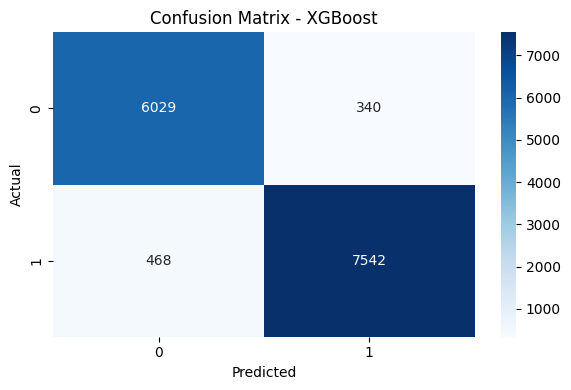

In [114]:
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()